In [1]:
#user-defined
import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py

#math
import numpy as np
import math
import scipy.fftpack
from scipy import signal
import scipy.interpolate
from scipy import integrate
pd.TimeSeries = pd.Series 

#gps
from geopy import distance

#plots
import pylab as plt
import matplotlib.pyplot as plt

In [3]:
windname = '/home/ecc/data/DesertDataOct/Run01/OctoberDesert1020_0_wind.hdf5'
odorname = '/home/ecc/data/DesertDataOct/Run01/OctoberDesert1020_0_odor.hdf5'
wd = hp.uncooperative_hdf5(windname)
wd

Dataset contains these keys: 
['trisonica']
Using only the first key:  trisonica


,header_seq,header_stamp_secs,header_stamp_nsecs,header_frame_id,header_stamp,speed,direction,northsouth,westeast,updown,temperature,pitch,roll,pressure,humidity,t_secs,t_nsecs,t
0,287,1603219698,575581073,b'',1.603220e+09,0.94,19.0,-0.15,-0.42,0.83,7.63,4.9,9.9,885.900024,35.599998,1603219698,576224204,1.603220e+09
1,288,1603219698,600331068,b'',1.603220e+09,1.47,27.0,-0.66,-1.30,0.15,7.39,4.9,9.9,885.900024,35.599998,1603219698,600942510,1.603220e+09
2,289,1603219698,625422954,b'',1.603220e+09,1.43,32.0,-0.75,-1.21,0.01,7.62,4.9,9.9,885.900024,35.599998,1603219698,626047771,1.603220e+09
3,290,1603219698,650298118,b'',1.603220e+09,1.44,21.0,-0.52,-1.34,0.12,7.52,4.9,9.9,885.900024,35.599998,1603219698,650777491,1.603220e+09
4,291,1603219698,675504922,b'',1.603220e+09,1.49,17.0,-0.42,-1.40,0.26,7.41,8.3,5.2,885.900024,35.599998,1603219698,675977126,1.603220e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,12273,1603219998,226118087,b'',1.603220e+09,1.67,119.0,-1.43,0.80,0.33,7.61,-9.7,1.5,885.700012,36.099998,1603219998,226828451,1.603220e+09
11987,12274,1603219998,251204013,b'',1.603220e+09,1.81,118.0,-1.54,0.82,0.48,7.82,-9.7,1.5,885.700012,36.099998,1603219998,251836811,1.603220e+09
11988,12275,1603219998,276432037,b'',1.603220e+09,1.78,136.0,-1.22,1.28,0.20,7.72,-3.7,-2.1,885.700012,36.200001,1603219998,277147461,1.603220e+09
11989,12276,1603219998,301510095,b'',1.603220e+09,1.65,124.0,-1.36,0.90,0.25,7.61,-3.7,-2.1,885.599976,36.200001,1603219998,302175900,1.603220e+09


In [4]:
time = wd.header_stamp_secs + (wd.header_stamp_nsecs*1e-9)
wd.insert(1 , 'time', time)
wd

,header_seq,time,header_stamp_secs,header_stamp_nsecs,header_frame_id,header_stamp,speed,direction,northsouth,westeast,updown,temperature,pitch,roll,pressure,humidity,t_secs,t_nsecs,t
0,287,1.603220e+09,1603219698,575581073,b'',1.603220e+09,0.94,19.0,-0.15,-0.42,0.83,7.63,4.9,9.9,885.900024,35.599998,1603219698,576224204,1.603220e+09
1,288,1.603220e+09,1603219698,600331068,b'',1.603220e+09,1.47,27.0,-0.66,-1.30,0.15,7.39,4.9,9.9,885.900024,35.599998,1603219698,600942510,1.603220e+09
2,289,1.603220e+09,1603219698,625422954,b'',1.603220e+09,1.43,32.0,-0.75,-1.21,0.01,7.62,4.9,9.9,885.900024,35.599998,1603219698,626047771,1.603220e+09
3,290,1.603220e+09,1603219698,650298118,b'',1.603220e+09,1.44,21.0,-0.52,-1.34,0.12,7.52,4.9,9.9,885.900024,35.599998,1603219698,650777491,1.603220e+09
4,291,1.603220e+09,1603219698,675504922,b'',1.603220e+09,1.49,17.0,-0.42,-1.40,0.26,7.41,8.3,5.2,885.900024,35.599998,1603219698,675977126,1.603220e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,12273,1.603220e+09,1603219998,226118087,b'',1.603220e+09,1.67,119.0,-1.43,0.80,0.33,7.61,-9.7,1.5,885.700012,36.099998,1603219998,226828451,1.603220e+09
11987,12274,1.603220e+09,1603219998,251204013,b'',1.603220e+09,1.81,118.0,-1.54,0.82,0.48,7.82,-9.7,1.5,885.700012,36.099998,1603219998,251836811,1.603220e+09
11988,12275,1.603220e+09,1603219998,276432037,b'',1.603220e+09,1.78,136.0,-1.22,1.28,0.20,7.72,-3.7,-2.1,885.700012,36.200001,1603219998,277147461,1.603220e+09
11989,12276,1.603220e+09,1603219998,301510095,b'',1.603220e+09,1.65,124.0,-1.36,0.90,0.25,7.61,-3.7,-2.1,885.599976,36.200001,1603219998,302175900,1.603220e+09


In [5]:
y = []
np.trapz(wd.direction,wd.time)

46234.4161362648

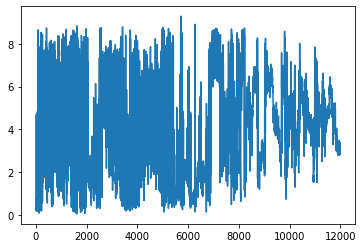

In [6]:
x = []
for i in range(len(wd.direction)-1):
    x.append(np.trapz([wd.direction[i],wd.direction[i+1]],[wd.time[i], wd.time[i+1]]))

fig = plt.figure()
ox = fig.add_subplot(111)
ox.plot(x)


### Stationary Bag B

In [8]:
fname='/home/ecc/data/DesertDataOct/StationeryWind/20201020_172919_windy_b_data.hdf'
wind_df=pd.read_hdf(fname)

In [9]:
wind_df.keys()

Index(['millis', 'lat', 'lon', 'gps_time', 'gps_date', 'wind', 'gps_date_str',
       'year', 'month', 'day', 'gps_time_str', 'hour', 'minute', 'second',
       'time_epoch', 'S2', 'D', 'U', 'V', 'W', 'T', 'H', 'AD', 'MD'],
      dtype='object')

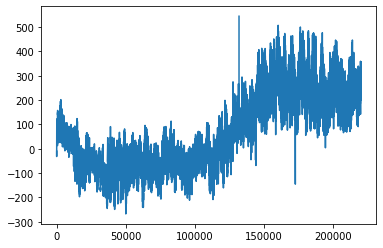

In [10]:
#integration of U vector
y= []
for i in range(len(wind_df.U)-1):
    y.append(np.trapz([wind_df.U[i],wind_df.U[i+1]],[wind_df.millis[i], wind_df.millis[i+1]]))
plt.plot(y)


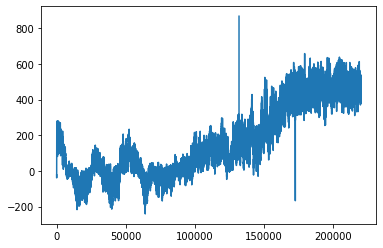

In [11]:
#integration of V vector
z= []
for i in range(len(wind_df.V)-1):
    z.append(np.trapz([wind_df.V[i],wind_df.V[i+1]],[wind_df.millis[i], wind_df.millis[i+1]]))
plt.plot(z)

In [116]:
arr1 =[]
arr2 =[]
for i in range(len(y)):
    if i==0:
        arr1.append(0)
    else:
        arr1.append(y[i]+arr1[i-1])

for i in range(len(z)):
    if i==0:
        arr2.append(0)
    else:
        arr2.append(z[i]+arr2[i-1])

#arr1 = U zonal velocity ; eastwest
#arr2 = V meridian velocity; Northsouth
particle = list(zip(arr1, arr2))
particle

[(0, 0),
 (-10.0, -21.999999999999996),
 (-39.0, -43.0),
 (-71.0, -54.5),
 (-77.0, -44.5),
 (-55.5, -38.0),
 (-18.5, -41.0),
 (18.0, -44.5),
 (74.0, -60.0),
 (158.5, -92.0),
 (234.0, -105.5),
 (290.5, -124.5),
 (343.0, -163.5),
 (370.5, -178.0),
 (361.0, -160.0),
 (379.0, -65.5),
 (429.0, 92.00000000000003),
 (453.5, 210.00000000000006),
 (465.5, 291.00000000000006),
 (485.5, 381.00000000000006),
 (512.5, 496.00000000000006),
 (547.5, 633.0),
 (580.0, 776.5),
 (609.0, 910.5),
 (635.0, 1015.5),
 (655.0, 1099.0),
 (678.0, 1193.5),
 (728.0, 1339.0),
 (801.5, 1517.5),
 (877.5, 1707.5),
 (961.5, 1903.0),
 (1040.5, 2081.5),
 (1106.5, 2236.0),
 (1166.0, 2376.5),
 (1219.0, 2527.0),
 (1276.5, 2693.0),
 (1351.0, 2890.5),
 (1443.5, 3117.5),
 (1549.0, 3334.0),
 (1657.5, 3539.0),
 (1768.5, 3747.0),
 (1879.5, 3960.5),
 (1984.0, 4176.0),
 (2080.5, 4389.5),
 (2172.5, 4606.5),
 (2263.0, 4827.0),
 (2347.0, 5055.5),
 (2436.5, 5281.5),
 (2529.0, 5500.0),
 (2606.0, 5708.5),
 (2677.0, 5914.5),
 (2758.0, 613

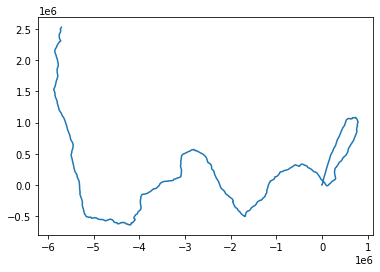

In [13]:
plt.plot(*zip(*particle))

#to ask: how to scale this time with the bag from the setup
#to ask: how to match the time of small bags with the stationery wind data 
#to ask: the plot is on the negative axis 

In [14]:
od = hp.uncooperative_hdf5(odorname)
od

Dataset contains these keys: 
['analog_output']
Using only the first key:  analog_output


,data,t_secs,t_nsecs,t
0,0.671380,1603219698,572021154,1.603220e+09
1,0.670128,1603219698,577018085,1.603220e+09
2,0.669503,1603219698,582246585,1.603220e+09
3,0.669816,1603219698,587173698,1.603220e+09
4,0.672631,1603219698,592109752,1.603220e+09
...,...,...,...,...
59948,1.206925,1603219998,312229822,1.603220e+09
59949,1.201919,1603219998,317187629,1.603220e+09
59950,1.175017,1603219998,322268602,1.603220e+09
59951,1.162192,1603219998,327180133,1.603220e+09


In [15]:
time = od.t_secs + (od.t_nsecs*1e-9)
od.insert(1 , 'time', time)
epoch=od.t-od.t[0]
od.insert(2,'epoch',epoch)

In [16]:
od

,data,time,epoch,t_secs,t_nsecs,t
0,0.671380,1.603220e+09,0.000000,1603219698,572021154,1.603220e+09
1,0.670128,1.603220e+09,0.004997,1603219698,577018085,1.603220e+09
2,0.669503,1.603220e+09,0.010225,1603219698,582246585,1.603220e+09
3,0.669816,1.603220e+09,0.015152,1603219698,587173698,1.603220e+09
4,0.672631,1.603220e+09,0.020088,1603219698,592109752,1.603220e+09
...,...,...,...,...,...,...
59948,1.206925,1.603220e+09,299.740209,1603219998,312229822,1.603220e+09
59949,1.201919,1.603220e+09,299.745166,1603219998,317187629,1.603220e+09
59950,1.175017,1.603220e+09,299.750247,1603219998,322268602,1.603220e+09
59951,1.162192,1.603220e+09,299.755159,1603219998,327180133,1.603220e+09


Text(0, 0.5, 'Odor Concentration')

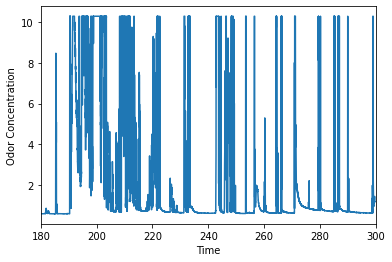

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(od.epoch, od.data)
ax.set_xlim(180,300)
ax.set_xlabel('Time')
ax.set_ylabel('Odor Concentration')

In [103]:
dfbag01 = hp.import_csv("~/data/DesertDataOct/Run01/OctoberRun01Bag01.csv") 
dfbag01

,time,_analog_output_data,_trisonica_direction,_trisonica_header_frame_id,_trisonica_header_seq,_trisonica_header_stamp_nsecs,_trisonica_header_stamp_secs,_trisonica_humidity,_trisonica_northsouth,_trisonica_pitch,...,_ublox_gps_fix_position_covariance_2,_ublox_gps_fix_position_covariance_3,_ublox_gps_fix_position_covariance_4,_ublox_gps_fix_position_covariance_5,_ublox_gps_fix_position_covariance_6,_ublox_gps_fix_position_covariance_7,_ublox_gps_fix_position_covariance_8,_ublox_gps_fix_position_covariance_type,_ublox_gps_fix_status_service,_ublox_gps_fix_status_status
0,1.603220e+09,0.671380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.603220e+09,NaN,19.0,NaN,287.0,575581073.0,1.603220e+09,35.599998,-0.15,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.603220e+09,0.670128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.603220e+09,0.669503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.603220e+09,0.669816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73438,1.603220e+09,1.201919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73439,1.603220e+09,1.175017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73440,1.603220e+09,NaN,111.0,NaN,12277.0,326195001.0,1.603220e+09,36.200001,-1.37,-3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73441,1.603220e+09,1.162192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:

dfbag01=dfbag01.interpolate()
#to ask: too many nan is interpolating a good idea?

Text(0, 0.5, 'Latitude')

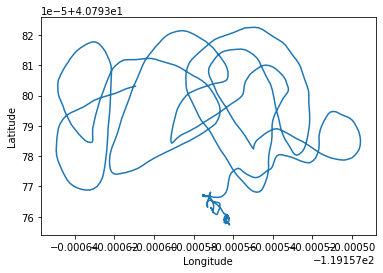

In [105]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(dfbag01._ublox_gps_fix_longitude, dfbag01._ublox_gps_fix_latitude)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


In [107]:
#creating epoch for CSV
epoch_time=dfbag01.time-dfbag01.time[0]
dfbag01.insert(1,'epoch',epoch_time)

In [109]:
query = 'epoch > 75 and epoch < 150'
df_gps= dfbag01.query(query)
df_gps

,time,epoch,_analog_output_data,_trisonica_direction,_trisonica_header_frame_id,_trisonica_header_seq,_trisonica_header_stamp_nsecs,_trisonica_header_stamp_secs,_trisonica_humidity,_trisonica_northsouth,...,_ublox_gps_fix_position_covariance_2,_ublox_gps_fix_position_covariance_3,_ublox_gps_fix_position_covariance_4,_ublox_gps_fix_position_covariance_5,_ublox_gps_fix_position_covariance_6,_ublox_gps_fix_position_covariance_7,_ublox_gps_fix_position_covariance_8,_ublox_gps_fix_position_covariance_type,_ublox_gps_fix_status_service,_ublox_gps_fix_status_status
18376,1.603220e+09,75.01,0.665592,197.000000,NaN,3287.000000,5.756330e+08,1.603220e+09,36.599998,0.170000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000155,2.0,3.0,2.0
18377,1.603220e+09,75.01,0.664810,195.666667,NaN,3287.166667,5.798204e+08,1.603220e+09,36.599998,0.158333,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000154,2.0,3.0,2.0
18378,1.603220e+09,75.01,0.667000,194.333333,NaN,3287.333333,5.840077e+08,1.603220e+09,36.599998,0.146667,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000154,2.0,3.0,2.0
18379,1.603220e+09,75.02,0.665123,193.000000,NaN,3287.500000,5.881950e+08,1.603220e+09,36.599998,0.135000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000153,2.0,3.0,2.0
18380,1.603220e+09,75.02,0.666375,191.666667,NaN,3287.666667,5.923823e+08,1.603220e+09,36.599998,0.123333,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000153,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36744,1.603220e+09,149.98,0.607565,86.166667,NaN,6285.833333,5.464691e+08,1.603220e+09,36.400002,-0.860000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
36745,1.603220e+09,149.98,0.607877,86.000000,NaN,6286.000000,5.506380e+08,1.603220e+09,36.400002,-0.930000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
36746,1.603220e+09,149.98,0.608190,83.166667,NaN,6286.166667,5.548255e+08,1.603220e+09,36.400002,-0.918333,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
36747,1.603220e+09,149.99,0.606001,80.333333,NaN,6286.333333,5.590130e+08,1.603220e+09,36.400002,-0.906667,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0


In [110]:
source_location_lat=df_gps._ublox_gps_fix_latitude.mean()
source_location_long=df_gps._ublox_gps_fix_longitude.mean()
source_location=[source_location_lat, source_location_long]
source_location

[40.79376709443614, -119.15757512132207]

In [111]:
query = '_analog_output_data > 5 and _analog_output_data <= 10'
df_tmp = dfbag01.query(query)
df_tmp

,time,epoch,_analog_output_data,_trisonica_direction,_trisonica_header_frame_id,_trisonica_header_seq,_trisonica_header_stamp_nsecs,_trisonica_header_stamp_secs,_trisonica_humidity,_trisonica_northsouth,...,_ublox_gps_fix_position_covariance_2,_ublox_gps_fix_position_covariance_3,_ublox_gps_fix_position_covariance_4,_ublox_gps_fix_position_covariance_5,_ublox_gps_fix_position_covariance_6,_ublox_gps_fix_position_covariance_7,_ublox_gps_fix_position_covariance_8,_ublox_gps_fix_position_covariance_type,_ublox_gps_fix_status_service,_ublox_gps_fix_status_status
45414,1.603220e+09,185.36,5.333311,182.000000,NaN,7701.285714,9.334688e+08,1.603220e+09,39.000000,0.034286,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
45415,1.603220e+09,185.37,6.160402,180.000000,NaN,7701.428571,9.370522e+08,1.603220e+09,39.000000,0.001429,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
45416,1.603220e+09,185.37,6.695322,178.000000,NaN,7701.571429,9.406357e+08,1.603220e+09,39.000000,-0.031429,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
45417,1.603220e+09,185.38,6.934002,176.000000,NaN,7701.714286,9.442191e+08,1.603220e+09,39.000000,-0.064286,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
45418,1.603220e+09,185.38,8.327295,174.000000,NaN,7701.857143,9.478025e+08,1.603220e+09,39.000000,-0.097143,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70320,1.603220e+09,287.02,6.761639,176.500000,NaN,11767.500000,5.894165e+08,1.603220e+09,35.799999,-0.105000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000204,2.0,3.0,2.0
71052,1.603220e+09,290.01,5.602960,238.000000,NaN,11887.000000,5.761471e+08,1.603220e+09,35.799999,2.060000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000158,2.0,3.0,2.0
73251,1.603220e+09,298.98,8.789327,139.833333,NaN,12246.166667,5.553459e+08,1.603220e+09,36.099998,-0.896667,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0
73281,1.603220e+09,299.11,7.075396,130.375000,NaN,12250.875000,6.734135e+08,1.603220e+09,36.099998,-1.258750,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.000100,2.0,3.0,2.0


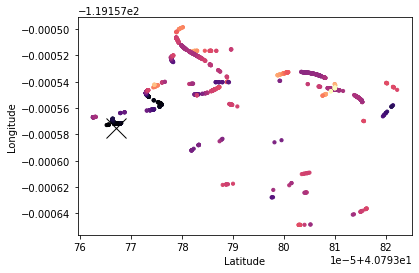

In [112]:
fig_odor_gps = plt.figure()
ax_odor_gps_filtered = fig_odor_gps.add_subplot(111)
ax_odor_gps_filtered.scatter(df_tmp._ublox_gps_fix_latitude, df_tmp._ublox_gps_fix_longitude, c=df_tmp._ublox_gps_fix_altitude, s=10, cmap='magma')
ax_odor_gps_filtered.set_xlabel('Latitude')
ax_odor_gps_filtered.set_ylabel('Longitude')

plt.plot([40.79376709443614], [-119.15757512132207], marker='x', markersize=20, color="black")

In [113]:
dfbag02 = hp.import_csv("~/data/DesertDataOct/Run02/OctoberRun02Bag0.csv") 
dfbag02

,time,_analog_output_data,_trisonica_direction,_trisonica_header_frame_id,_trisonica_header_seq,_trisonica_header_stamp_nsecs,_trisonica_header_stamp_secs,_trisonica_humidity,_trisonica_northsouth,_trisonica_pitch,...,_ublox_gps_fix_position_covariance_2,_ublox_gps_fix_position_covariance_3,_ublox_gps_fix_position_covariance_4,_ublox_gps_fix_position_covariance_5,_ublox_gps_fix_position_covariance_6,_ublox_gps_fix_position_covariance_7,_ublox_gps_fix_position_covariance_8,_ublox_gps_fix_position_covariance_type,_ublox_gps_fix_status_service,_ublox_gps_fix_status_status
0,1.603221e+09,0.636031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.603221e+09,0.635718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.603221e+09,NaN,256.0,NaN,1.0,554316043.0,1.603221e+09,34.799999,1.16,-3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.603221e+09,0.634467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.603221e+09,0.636031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73433,1.603221e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.0001,2.0,3.0,2.0
73434,1.603221e+09,0.593488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73435,1.603221e+09,NaN,135.0,NaN,11990.0,280133008.0,1.603221e+09,32.000000,-1.38,-3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73436,1.603221e+09,0.592237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
dfbag02=dfbag02.interpolate()
#creating epoch for CSV
epoch_time=dfbag02.time-dfbag02.time[0]
dfbag02.insert(1,'epoch_time',epoch_time)

In [115]:
dfbag02
#to ask: need to plot the smaller odor encounters with the wind particule simulation

,time,epoch_time,_analog_output_data,_trisonica_direction,_trisonica_header_frame_id,_trisonica_header_seq,_trisonica_header_stamp_nsecs,_trisonica_header_stamp_secs,_trisonica_humidity,_trisonica_northsouth,...,_ublox_gps_fix_position_covariance_2,_ublox_gps_fix_position_covariance_3,_ublox_gps_fix_position_covariance_4,_ublox_gps_fix_position_covariance_5,_ublox_gps_fix_position_covariance_6,_ublox_gps_fix_position_covariance_7,_ublox_gps_fix_position_covariance_8,_ublox_gps_fix_position_covariance_type,_ublox_gps_fix_status_service,_ublox_gps_fix_status_status
0,1.603221e+09,0.00,0.636031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.603221e+09,0.00,0.635718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.603221e+09,0.00,0.635093,256.000000,NaN,1.000000,5.543160e+08,1.603221e+09,34.799999,1.160000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.603221e+09,0.01,0.634467,255.666667,NaN,1.166667,5.584835e+08,1.603221e+09,34.799999,1.160000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.603221e+09,0.01,0.636031,255.333333,NaN,1.333333,5.626510e+08,1.603221e+09,34.799999,1.160000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73433,1.603221e+09,299.72,0.593019,125.000000,NaN,11989.714286,2.730362e+08,1.603221e+09,32.000000,-1.471429,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.0001,2.0,3.0,2.0
73434,1.603221e+09,299.73,0.593488,130.000000,NaN,11989.857143,2.765846e+08,1.603221e+09,32.000000,-1.425714,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.0001,2.0,3.0,2.0
73435,1.603221e+09,299.73,0.592862,135.000000,NaN,11990.000000,2.801330e+08,1.603221e+09,32.000000,-1.380000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.0001,2.0,3.0,2.0
73436,1.603221e+09,299.73,0.592237,135.000000,NaN,11990.000000,2.801330e+08,1.603221e+09,32.000000,-1.380000,...,0.0,0.0,0.000196,0.0,0.0,0.0,0.0001,2.0,3.0,2.0
